### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

## Assignment template

### Scenario
You are a data analyst working for Turtle Games, a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 
- how customers accumulate loyalty points (Week 1)
- how useful are remuneration and spending scores data (Week 2)
- can social data (e.g. customer reviews) be used in marketing campaigns (Week 3)
- what is the impact on sales per product (Week 4)
- the reliability of the data (e.g. normal distribution, Skewness, Kurtosis) (Week 5)
- if there is any possible relationship(s) in sales between North America, Europe, and global sales (Week 6).

# Week 1 assignment: Linear regression using Python
The marketing department of Turtle Games prefers Python for data analysis. As you are fluent in Python, they asked you to assist with data analysis of social media data. The marketing department wants to better understand how users accumulate loyalty points. Therefore, you need to investigate the possible relationships between the loyalty points, age, remuneration, and spending scores. Note that you will use this data set in future modules as well and it is, therefore, strongly encouraged to first clean the data as per provided guidelines and then save a copy of the clean data for future use.

## Instructions
1. Load and explore the data.
    1. Create a new DataFrame (e.g. reviews).
    2. Sense-check the DataFrame.
    3. Determine if there are any missing values in the DataFrame.
    4. Create a summary of the descriptive statistics.
2. Remove redundant columns (`language` and `platform`).
3. Change column headings to names that are easier to reference (e.g. `renumeration` and `spending_score`).
4. Save a copy of the clean DataFrame as a CSV file. Import the file to sense-check.
5. Use linear regression and the `statsmodels` functions to evaluate possible linear relationships between loyalty points and age/renumeration/spending scores to determine whether these can be used to predict the loyalty points.
    1. Specify the independent and dependent variables.
    2. Create the OLS model.
    3. Extract the estimated parameters, standard errors, and predicted values.
    4. Generate the regression table based on the X coefficient and constant values.
    5. Plot the linear regression and add a regression line.
6. Include your insights and observations.

## 1. Load and explore the data

In [3]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols

In [5]:
# Load the CSV file(s) as reviews.
reviews = pd.read_csv('turtle_reviews.csv')

# View the DataFrame.
reviews.head()

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap


In [6]:
# Any missing values?
reviews.isnull().sum()

gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64

In [7]:
# Explore the data.
print(reviews.columns)
reviews.info()

Index(['gender', 'age', 'remuneration (k£)', 'spending_score (1-100)',
       'loyalty_points', 'education', 'language', 'platform', 'product',
       'review', 'summary'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: f

In [8]:
# Descriptive statistics.
reviews.describe()

,age,remuneration (k£),spending_score (1-100),loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


## 2. Drop columns

In [9]:
# Drop unnecessary columns.
reviews_2 = reviews.drop(['language', 'platform'], axis=1)

reviews_2.head()

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


## 3. Rename columns

In [10]:
# Rename the column headers.
reviews_2 = reviews_2.rename(columns={'remuneration (k£)':'remuneration', 
                             'spending_score (1-100)':'spending_score'})

# View column names.
reviews_2.head()

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


## 4. Save the DataFrame as a CSV file

In [11]:
# Create a CSV file as output.
reviews_2.to_csv('turtle_reviews_cleaned.csv')

In [12]:
# Import new CSV file with Pandas.
reviews = pd.read_csv('turtle_reviews_cleaned.csv')

# View DataFrame.
reviews.head()

,Unnamed: 0,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


## 5. Linear regression

### 5a) spending vs loyalty

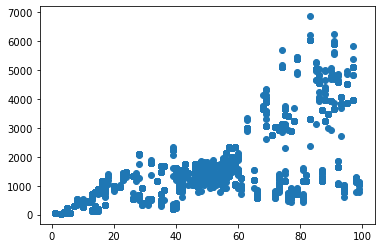

In [13]:
# Independent variable.
x = reviews['spending_score']

# Dependent variable.
y = reviews['loyalty_points']

# Check for linearity with Matplotlib 
plt.scatter(x, y)

In [14]:
# OLS model and summary.
f = 'y ~ x'
test = ols(f, data = reviews).fit()

test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Fri, 23 Dec 2022   Prob (F-statistic):          2.92e-263
Time:                        12:07:46   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.102    -165.129      15.024
x             33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
# Extract the estimated parameters.
print("Parameters:", test.params)

# Extract the standard errors.
print("Standard errors:", test.bse)

# Extract the predicted values.
print("Predicted values:", test.predict())

Parameters: Intercept   -75.052663
x            33.061693
dtype: float64
Standard errors: Intercept    45.930554
x             0.814419
dtype: float64
Predicted values: [1214.35337415 2602.94449102  123.31749662 ... 2933.56142361  453.93442921
  189.44088314]


In [16]:
# Set the X coefficient and the constant to generate the regression table.
y_pred = (-75.0527) + 33.0617 * reviews['spending_score']

# View the output.
y_pred

0       1214.3536
1       2602.9450
2        123.3175
3       2470.6982
4       1247.4153
          ...    
1995    2206.2046
1996     189.4409
1997    2933.5620
1998     453.9345
1999     189.4409
Name: spending_score, Length: 2000, dtype: float64

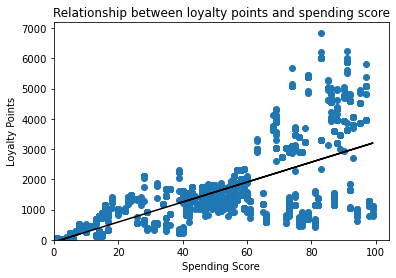

In [17]:
# Plot the graph with a regression line.
plt.scatter(x, y)

# Plot the regression line in black 
plt.plot(x, y_pred, color = 'black')

# Set the x and y limits on the axis 
plt.xlim(0)
plt.ylim(0)

# Label the plot 
plt.xlabel('Spending Score')
plt.ylabel('Loyalty Points')
plt.title('Relationship between loyalty points and spending score')

# Save the plot 
plt.savefig('Relationship between loyalty points and spending score')

# View the plot 
plt.show()

### 5b) remuneration vs loyalty

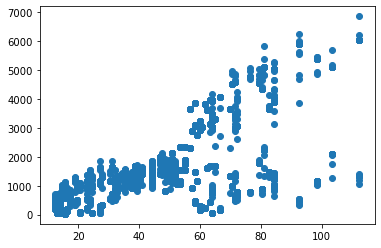

In [18]:
# Independent variable.
x = reviews['remuneration']

# Dependent variable.
y = reviews['loyalty_points']

# Check for linearity with Matplotlib 
plt.scatter(x, y)

In [19]:
# OLS model and summary.
f = 'y ~ x'
test = ols(f, data = reviews).fit()

test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Fri, 23 Dec 2022   Prob (F-statistic):          2.43e-209
Time:                        12:10:21   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.6865     52.171     -1.259      0.208    -168.001      36.628
x             34.1878      0.978     34.960      0.000      32.270      36.106
==============================================================================
Omnibus:                       21.285   Durbin-Watson:                   3.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.715
Skew:                           0.089   Prob(JB):                     1.30e-07
Kurtosis:                       3.590   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
# Extract the estimated parameters.
print("Parameters:", test.params)

# Extract the standard errors.
print("Standard errors:", test.bse)

# Extract the predicted values.
print("Predicted values:", test.predict())

Parameters: Intercept   -65.686513
x            34.187825
dtype: float64
Standard errors: Intercept    52.170717
x             0.977925
dtype: float64
Predicted values: [ 354.82374068  354.82374068  382.85775758 ... 3102.15739671 3298.39551499
 3102.15739671]


In [21]:
# Set the the X coefficient and the constant to generate the regression table.
y_pred = (-65.6865) + 34.1878 * reviews['remuneration']

# View the output.
y_pred

0        354.823440
1        354.823440
2        382.857436
3        382.857436
4        410.891432
           ...     
1995    2821.815088
1996    3102.155048
1997    3102.155048
1998    3298.393020
1999    3102.155048
Name: remuneration, Length: 2000, dtype: float64

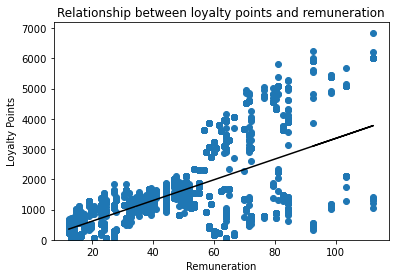

In [22]:
# Plot the graph with a regression line.
plt.scatter(x, y)

# Plot the regression line in black 
plt.plot(x, y_pred, color = 'black')

# Set the x and y limits on the axis 
plt.ylim(0)

# Label the plot 
plt.xlabel('Remuneration')
plt.ylabel('Loyalty Points')
plt.title('Relationship between loyalty points and remuneration')

# save the plot 
plt.savefig('Relationship between loyalty points and remuneration')

# View the plot 
plt.show()

### 5c) age vs loyalty

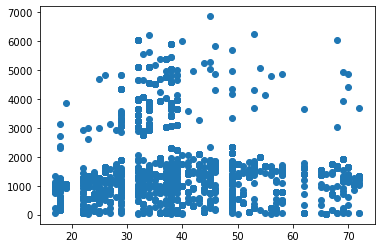

In [23]:
# Independent variable.
x = reviews['age']

# Dependent variable.
y = reviews['loyalty_points']

# Check for linearity using Matplotlib
plt.scatter(x,y)

In [24]:
# OLS model and summary.
f = 'y ~ x'
test = ols(f, data = reviews).fit()

test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Fri, 23 Dec 2022   Prob (F-statistic):             0.0577
Time:                        12:12:23   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1736.5177     88.249     19.678      0.000    1563.449    1909.587
x             -4.0128      2.113     -1.899      0.058      -8.157       0.131
==============================================================================
Omnibus:                      481.477   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.734
Skew:                           1.449   Prob(JB):                    2.36e-204
Kurtosis:                       4.688   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
# Extract the estimated parameters.
print("Parameters:", test.params)

# Extract the standard errors.
print("Standard errors:", test.bse)

# Extract the predicted values.
print("Predicted values:", test.predict())

Parameters: Intercept    1736.517739
x              -4.012805
dtype: float64
Standard errors: Intercept    88.248731
x             2.113177
dtype: float64
Predicted values: [1664.2872467  1644.22322095 1648.2360261  ... 1600.0823643  1600.0823643
 1608.1079746 ]


In [26]:
# Set the X coefficient and the constant to generate the regression table.
y_pred = 1736.5177 + (-4.0128 * reviews['age'])

# View the output.
y_pred                

0       1664.2873
1       1644.2233
2       1648.2361
3       1636.1977
4       1604.0953
          ...    
1995    1588.0441
1996    1563.9673
1997    1600.0825
1998    1600.0825
1999    1608.1081
Name: age, Length: 2000, dtype: float64

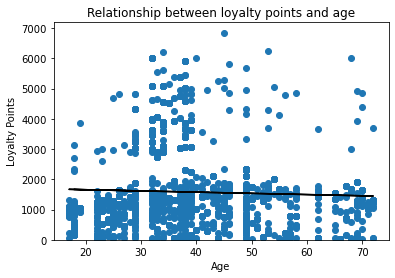

In [28]:
# Plot the graph with a regression line.
plt.scatter(x, y)

# Plot the regression line in black 
plt.plot(x, y_pred, color = 'black')

# Set the x and y limits on the axis 
plt.ylim(0)

# Label the plot 
plt.xlabel('Age')
plt.ylabel('Loyalty Points')
plt.title('Relationship between loyalty points and age')

# View the plot 
plt.show()

## 6. Observations and insights

***Your observations here...***






An R-squared value of 0.45 was calculated for loyalty points vs spending score suggesting some correlation between the two variables. 

Similarly, this is the case for the relationship between loyalty points and remuneration, however less emphatically with an R-squared value of 0.38. 

There is no relationship between age and loyalty points.

Therefore we can use age and remuneration (with caution) to predict the loyalty points a customer might have, however not age.

# 

# Week 2 assignment: Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## Instructions
1. Prepare the data for clustering. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame (e.g. `df2`) containing the `renumeration` and `spending_score` columns.
    3. Explore the new DataFrame. 
2. Plot the renumeration versus spending score.
    1. Create a scatterplot.
    2. Create a pairplot.
3. Use the Silhouette and Elbow methods to determine the optimal number of clusters for *k*-means clustering.
    1. Plot both methods and explain how you determine the number of clusters to use.
    2. Add titles and legends to the plot.
4. Evaluate the usefulness of at least three values for *k* based on insights from the Elbow and Silhoutte methods.
    1. Plot the predicted *k*-means.
    2. Explain which value might give you the best clustering.
5. Fit a final model using your selected value for *k*.
    1. Justify your selection and comment on the respective cluster sizes of your final solution.
    2. Check the number of observations per predicted class.
6. Plot the clusters and interpret the model.

## 1. Load and explore the data

In [27]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [29]:
# Load the CSV file(s) as df2.
reviews = pd.read_csv('turtle_reviews_cleaned.csv')

# View DataFrame.
reviews.head()

,Unnamed: 0,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [30]:
# Drop unnecessary columns.
df_2 = reviews.drop(columns = ['Unnamed: 0', 'gender', 'age', 'loyalty_points', 'education',
                    'product', 'review', 'summary'])

# View DataFrame.
df_2

,remuneration,spending_score
0,12.30,39
1,12.30,81
2,13.12,6
3,13.12,77
4,13.94,40
...,...,...
1995,84.46,69
1996,92.66,8
1997,92.66,91
1998,98.40,16


In [31]:
# Explore the data.
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   remuneration    2000 non-null   float64
 1   spending_score  2000 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


In [32]:
# Descriptive statistics.
df_2.describe()

,remuneration,spending_score
count,2000.000000,2000.000000
mean,48.079060,50.000000
std,23.123984,26.094702
min,12.300000,1.000000
25%,30.340000,32.000000
50%,47.150000,50.000000
75%,63.960000,73.000000
max,112.340000,99.000000


## 2. Plot

<AxesSubplot:xlabel='remuneration', ylabel='spending_score'>

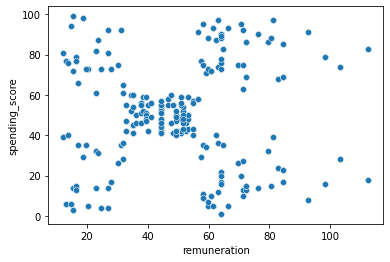

In [33]:
# Create a scatterplot with Seaborn.
sns.scatterplot(x='remuneration',
                y='spending_score',
                data=df_2)

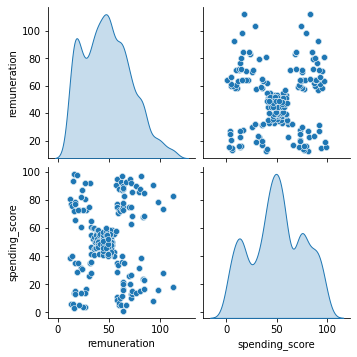

In [34]:
# Create a pairplot with Seaborn.
x = df_2[['remuneration', 'spending_score']]

sns.pairplot(df_2,
             vars=x,
             diag_kind='kde')

## 3. Elbow and silhoutte methods

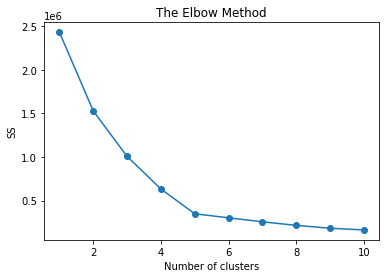

In [35]:
# Determine the number of clusters: Elbow method.
ss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,
                    init='k-means++',
                    max_iter=300,
                    n_init=10,
                    random_state=0)
    kmeans.fit(x)
    ss.append(kmeans.inertia_)

# Plot the elbow method
plt.plot(range(1, 11),
         ss,
         marker='o')

plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("SS")

plt.show()

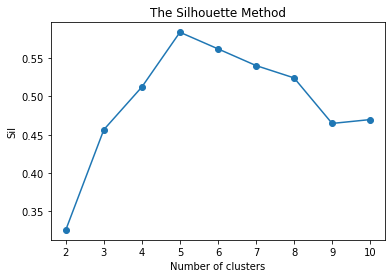

In [36]:
# Determine the number of clusters: Silhouette method.
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters = k).fit(x)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(x,
                                labels,
                                metric = 'euclidean'))
    
# Plot the silhouette method.
plt.plot(range(2, kmax+1),
         sil,
         marker='o')


plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

plt.show()

## 4. Evaluate k-means model at different values of *k*

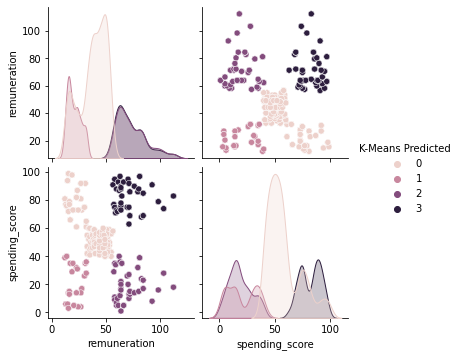

In [37]:
# Use 4 clusters:
kmeans = KMeans(n_clusters = 4,
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(x)

clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [38]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

0    1013
3     356
2     351
1     280
Name: K-Means Predicted, dtype: int64

In [39]:
# View the K-Means predicted.
x.head()

,remuneration,spending_score,K-Means Predicted
0,12.30,39,1
1,12.30,81,0
2,13.12,6,1
3,13.12,77,0
4,13.94,40,1


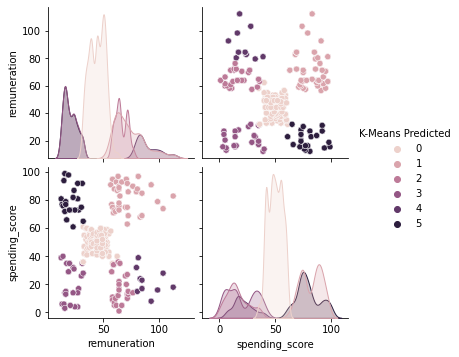

In [40]:
# Use 6 clusters:
kmeans = KMeans(n_clusters = 6,
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(x)

clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [41]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

0    767
1    356
3    271
5    269
2    214
4    123
Name: K-Means Predicted, dtype: int64

In [42]:
# View the K-Means predicted.
x.head()

,remuneration,spending_score,K-Means Predicted
0,12.30,39,3
1,12.30,81,5
2,13.12,6,3
3,13.12,77,5
4,13.94,40,3


## 5. Fit final model and justify your choice

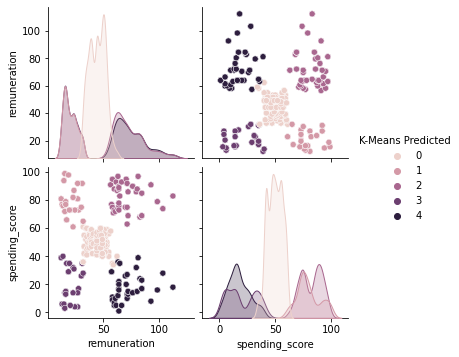

In [43]:
# Apply the final model, using 5 clusters. 
kmeans = KMeans(n_clusters = 5,
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(x)

clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [44]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

0    774
2    356
4    330
3    271
1    269
Name: K-Means Predicted, dtype: int64

## 6. Plot and interpret the clusters

In [45]:
# View the K-Means predicted.
x.head()

,remuneration,spending_score,K-Means Predicted
0,12.30,39,3
1,12.30,81,1
2,13.12,6,3
3,13.12,77,1
4,13.94,40,3


<AxesSubplot:xlabel='remuneration', ylabel='spending_score'>

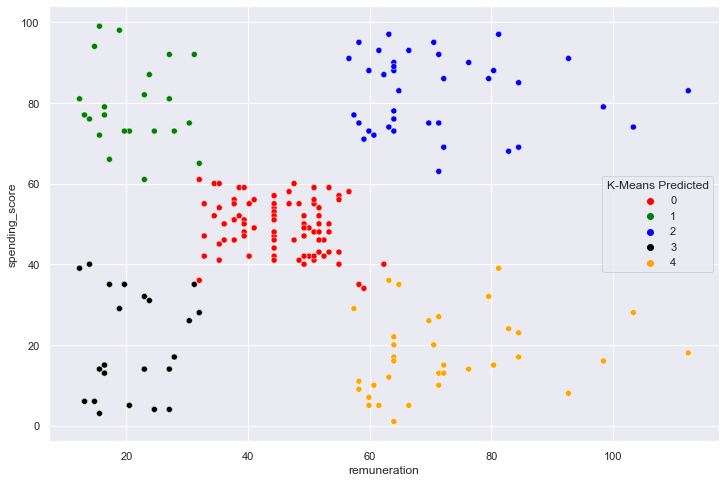

In [24]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

sns.scatterplot(x='remuneration' , 
                y ='spending_score',
                data=x ,
                hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black', 'orange'])

## 7. Discuss: Insights and observations

***Your observations here...***

Using the Elbow and Silhouette methods, it was determined that when exploring the relationship between remuneration and spending score, the most appropriate number of clusters for this dataset was five. 

Turtle Games might wish to focus efforts on specific clusters through targetted campaigns. For example an obvious group to target are those on high remuneration but low spending score - there is potential for them to spend more on Turtle Games. 

# 

# Week 3 assignment: NLP using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, you need to apply NLP on the data set.

## Instructions
1. Load and explore the data. 
    1. Sense-check the DataFrame.
    2. You only need to retain the `review` and `summary` columns.
    3. Determine if there are any missing values.
2. Prepare the data for NLP
    1. Change to lower case and join the elements in each of the columns respectively (`review` and `summary`).
    2. Replace punctuation in each of the columns respectively (`review` and `summary`).
    3. Drop duplicates in both columns (`review` and `summary`).
3. Tokenise and create wordclouds for the respective columns (separately).
    1. Create a copy of the DataFrame.
    2. Apply tokenisation on both columns.
    3. Create and plot a wordcloud image.
4. Frequency distribution and polarity.
    1. Create frequency distribution.
    2. Remove alphanumeric characters and stopwords.
    3. Create wordcloud without stopwords.
    4. Identify 15 most common words and polarity.
5. Review polarity and sentiment.
    1. Plot histograms of polarity (use 15 bins) for both columns.
    2. Review the sentiment scores for the respective columns.
6. Identify and print the top 20 positive and negative reviews and summaries respectively.
7. Include your insights and observations.

## 1. Load and explore the data

In [46]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt
import seaborn as sns

nltk.download ('punkt')
nltk.download ('stopwords')

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /Users/alifazel/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/alifazel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [47]:
# Load the data set as df3.
df3 = pd.read_csv('turtle_reviews_cleaned.csv')

# View DataFrame.
df3.head()

,Unnamed: 0,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [48]:
# Explore data set.
print(df3.info())
df3.describe().round(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      2000 non-null   int64  
 1   gender          2000 non-null   object 
 2   age             2000 non-null   int64  
 3   remuneration    2000 non-null   float64
 4   spending_score  2000 non-null   int64  
 5   loyalty_points  2000 non-null   int64  
 6   education       2000 non-null   object 
 7   product         2000 non-null   int64  
 8   review          2000 non-null   object 
 9   summary         2000 non-null   object 
dtypes: float64(1), int64(5), object(4)
memory usage: 156.4+ KB
None


,Unnamed: 0,age,remuneration,spending_score,loyalty_points,product
count,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00
mean,999.50,39.49,48.08,50.00,1578.03,4320.52
std,577.49,13.57,23.12,26.09,1283.24,3148.94
min,0.00,17.00,12.30,1.00,25.00,107.00
25%,499.75,29.00,30.34,32.00,772.00,1589.25
50%,999.50,38.00,47.15,50.00,1276.00,3624.00
75%,1499.25,49.00,63.96,73.00,1751.25,6654.00
max,1999.00,72.00,112.34,99.00,6847.00,11086.00


In [49]:
# Keep necessary columns. Drop unnecessary columns.
df3 = df3.drop(['Unnamed: 0', 'gender', 'age', 'remuneration', 'spending_score', 
                'loyalty_points', 'education', 'product'], axis = 1)

# View DataFrame.
df3

,review,summary
0,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,As my review of GF9's previous screens these w...,Money trap
...,...,...
1995,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Great game. Did not think I would like it whe...,Super fun
1997,Great game for all.........\nKeeps the mind ni...,Great Game
1998,fun game!,Four Stars


In [50]:
# Determine if there are any missing values.
df3.isnull().sum()

review     0
summary    0
dtype: int64

## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [51]:
# Review: Change all to lower case and join with a space.
df3['review'] = df3['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Preview the result.
df3['review'].head(10)

0    when it comes to a dm's screen, the space on t...
1    an open letter to galeforce9*: your unpainted ...
2    nice art, nice printing. why two panels are fi...
3    amazing buy! bought it as a gift for our new d...
4    as my review of gf9's previous screens these w...
5                                       grandson loves
6    i have bought many gm screens over the years, ...
7                           came in perfect condition.
8    could be better but its still great. i love th...
9    my review will mirror others in that this kind...
Name: review, dtype: object

In [52]:
# Summary: Change all to lower case and join with a space.
df3['summary'] = df3['summary'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Preview the result.
df3['summary'].head(10)

0    the fact that 50% of this space is wasted on a...
1    another worthless dungeon master's screen from...
2                      pretty, but also pretty useless
3                                           five stars
4                                           money trap
5                                           five stars
6                                  best gm screen ever
7                                           five stars
8                       great but could be even better
9    another missed opportunity. not a value add to...
Name: summary, dtype: object

### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [53]:
# Replace all the punctuations in review column.
df3['review'] = df3['review'].str.replace('[^\w\s]','')

# Preview the result.
df3['review'].head()

0    when it comes to a dms screen the space on the...
1    an open letter to galeforce9 your unpainted mi...
2    nice art nice printing why two panels are fill...
3    amazing buy bought it as a gift for our new dm...
4    as my review of gf9s previous screens these we...
Name: review, dtype: object

In [54]:
# Replace all the puncuations in summary column.
df3['summary'] = df3['summary'].str.replace('[^\w\s]','')

# Preview the result.
df3['summary'].head()

0    the fact that 50 of this space is wasted on ar...
1    another worthless dungeon masters screen from ...
2                       pretty but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

### 2c) Drop duplicates in both columns

In [55]:
# Check for duplicates 
print(df3['summary'].duplicated().sum())
df3['review'].duplicated().sum()

649


50

In [56]:
# Check shape before dropping duplicates
df3.shape

(2000, 2)

In [57]:
# Drop duplicates in both columns.
df3 = df3.drop_duplicates(subset=['summary'])
df3 = df3.drop_duplicates(subset=['review'])

df3.reset_index(inplace=True)

# View DataFrame.
print(df3.shape)
df3.head(20)

(1350, 3)


,index,review,summary
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,3,amazing buy bought it as a gift for our new dm...,five stars
4,4,as my review of gf9s previous screens these we...,money trap
5,6,i have bought many gm screens over the years b...,best gm screen ever
6,8,could be better but its still great i love the...,great but could be even better
7,9,my review will mirror others in that this kind...,another missed opportunity not a value add to ...
8,11,cant wait to use it,love the map
9,12,this is a campaign specific dm screen meant to...,not a general dm screen


## 3. Tokenise and create wordclouds

In [58]:
# Create new DataFrame (copy DataFrame).
df3_2 = df3.copy()

# View DataFrame.
df3_2.head()

,index,review,summary
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,3,amazing buy bought it as a gift for our new dm...,five stars
4,4,as my review of gf9s previous screens these we...,money trap


In [59]:
# Review: Create a word cloud.
# Create an empty string variable.
all_reviews = ''
for i in range(df3_2.shape[0]):
    # Add each comment.
    all_reviews = all_reviews + df3_2['review'][i]

In [60]:
# Set the colour palette.
sns.set(color_codes=True)

# Create a WordCloud object.
word_cloud = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(all_reviews) 

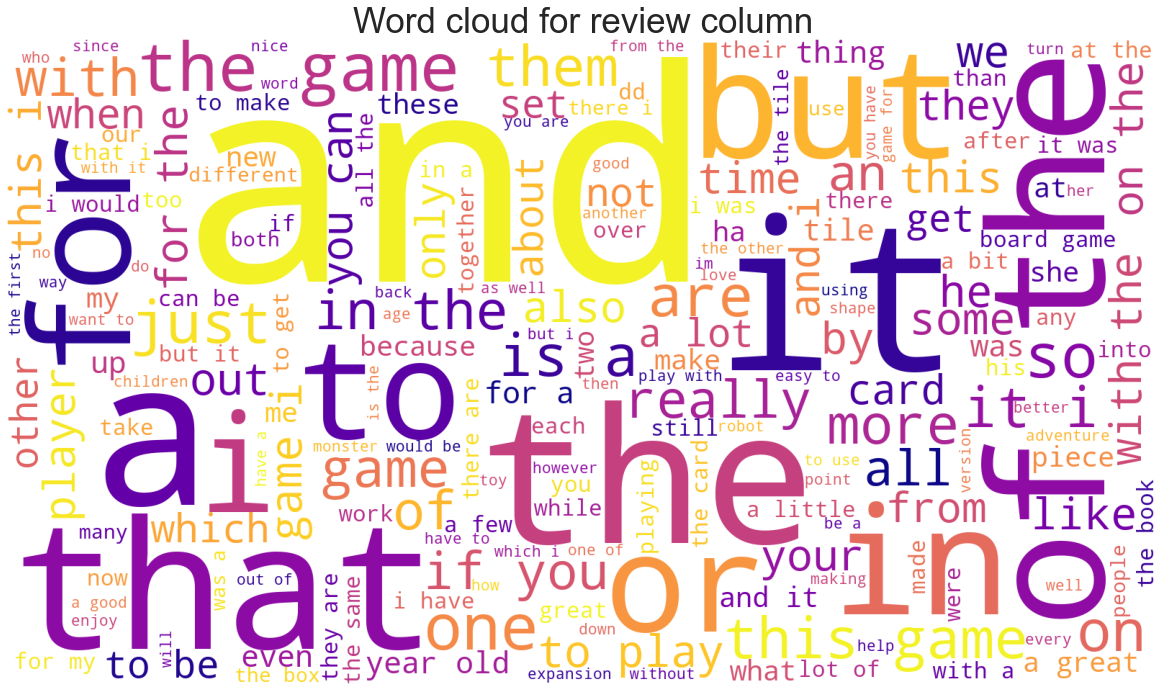

In [61]:
# Review: Plot the WordCloud image.                  
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(word_cloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.title('Word cloud for review column', size = 35)
plt.show()

In [62]:
# Summary: Create a word cloud.
# Create an empty string variable.
all_summary = ''
for i in range(df3_2.shape[0]):
    # Add each comment.
    all_summary = all_summary + df3_2['summary'][i]

In [63]:
# Set the colour palette.
sns.set(color_codes=True)

# Create a WordCloud object.
word_cloud = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(all_summary) 

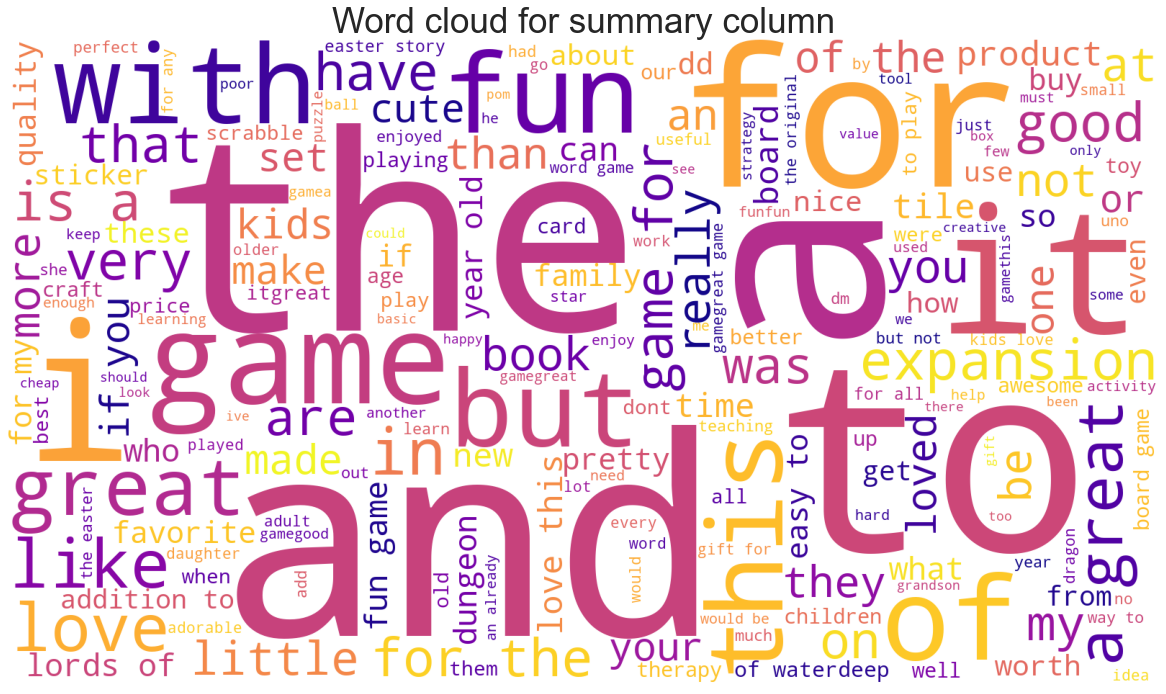

In [64]:
# Summary: Plot the WordCloud image.
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(word_cloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.title('Word cloud for summary column', size = 35)
plt.show()

In [65]:
# Apply tokenisation to both columns.
df3_2['review'] = df3_2['review'].apply(word_tokenize)

df3_2['summary'] = df3_2['summary'].apply(word_tokenize)

df3_2.head()

,index,review,summary
0,0,"[when, it, comes, to, a, dms, screen, the, spa...","[the, fact, that, 50, of, this, space, is, was..."
1,1,"[an, open, letter, to, galeforce9, your, unpai...","[another, worthless, dungeon, masters, screen,..."
2,2,"[nice, art, nice, printing, why, two, panels, ...","[pretty, but, also, pretty, useless]"
3,3,"[amazing, buy, bought, it, as, a, gift, for, o...","[five, stars]"
4,4,"[as, my, review, of, gf9s, previous, screens, ...","[money, trap]"


## 4. Frequency distribution and polarity
### 4a) Create frequency distribution

In [66]:
# Define an empty list of tokens for review column
all_tokens_review = []

for i in range(df3_2.shape[0]):
    # Add each token to the list.
    all_tokens_review = all_tokens_review + df3_2['review'][i]

In [67]:
# Determine the frequency distribution.
fdist_reviews = FreqDist(all_tokens_review)

# Preview data.
fdist_reviews

FreqDist({'the': 5019, 'and': 2934, 'to': 2843, 'a': 2829, 'of': 2261, 'i': 1887, 'it': 1830, 'is': 1593, 'this': 1549, 'for': 1360, ...})

In [68]:
# Define an empty list of tokens for summary column
all_tokens_summary = []

for i in range(df3_2.shape[0]):
    # Add each token to the list.
    all_tokens_summary = all_tokens_summary + df3_2['summary'][i]

In [69]:
# Determine the frequency distribution.
fdist_summary = FreqDist(all_tokens_summary)

# Preview data.
fdist_summary

FreqDist({'game': 268, 'the': 257, 'a': 238, 'great': 237, 'for': 229, 'to': 192, 'fun': 175, 'and': 168, 'it': 139, 'of': 131, ...})

### 4b) Remove alphanumeric characters and stopwords

In [70]:
# Delete all the alpanum.
tokens1_review = [word for word in all_tokens_review if word.isalnum()]
tokens1_summary = [word for word in all_tokens_summary if word.isalnum()]

In [71]:
# Remove all the stopwords
english_stopwords = set(stopwords.words('english'))

# Create a filtered list of tokens without stop words.
tokens2_review = [x for x in tokens1_review if x.lower() not in english_stopwords]
tokens2_summary = [x for x in tokens1_summary if x.lower() not in english_stopwords]

# Define an empty string variable.
tokens2_review_string = ''
tokens2_summary_string = ''

for value in tokens2_review:
    # Add each filtered token word to the string.
    tokens2_review_string = tokens2_review_string + value + ' '
    
for value in tokens2_summary:
    # Add each filtered token word to the string.
    tokens2_summary_string = tokens2_summary_string + value + ' '

In [72]:
# We now have a string of all the words excluding stop words for both columns 
tokens2_summary_string

'fact 50 space wasted art terribly informative needed art another worthless dungeon masters screen galeforce9 pretty also pretty useless five stars money trap best gm screen ever great could even better another missed opportunity value add product line love map general dm screen weak game fell completely flat good book buckley card mommer advanced good gets better know youre getting dont bother worst value ive ever seen enough product good product temporary tattoos good gift huge hit gorgeous pictures wonderful designs wow great coloring book nice book great pictures perfect well done relaxation beautiful coloring book pictures great ive done one gave great buy cant wait work book stained glass perfection four stars beautiful nice three stars like every image contained stained glass coloring book creative stained glass pictures nice pictures great transaction drawings nice put windows great 30 minute toy great ok best fun robot themed gift 6 yr old great party thank bag addition tiny b

### 4c) Create wordcloud without stopwords

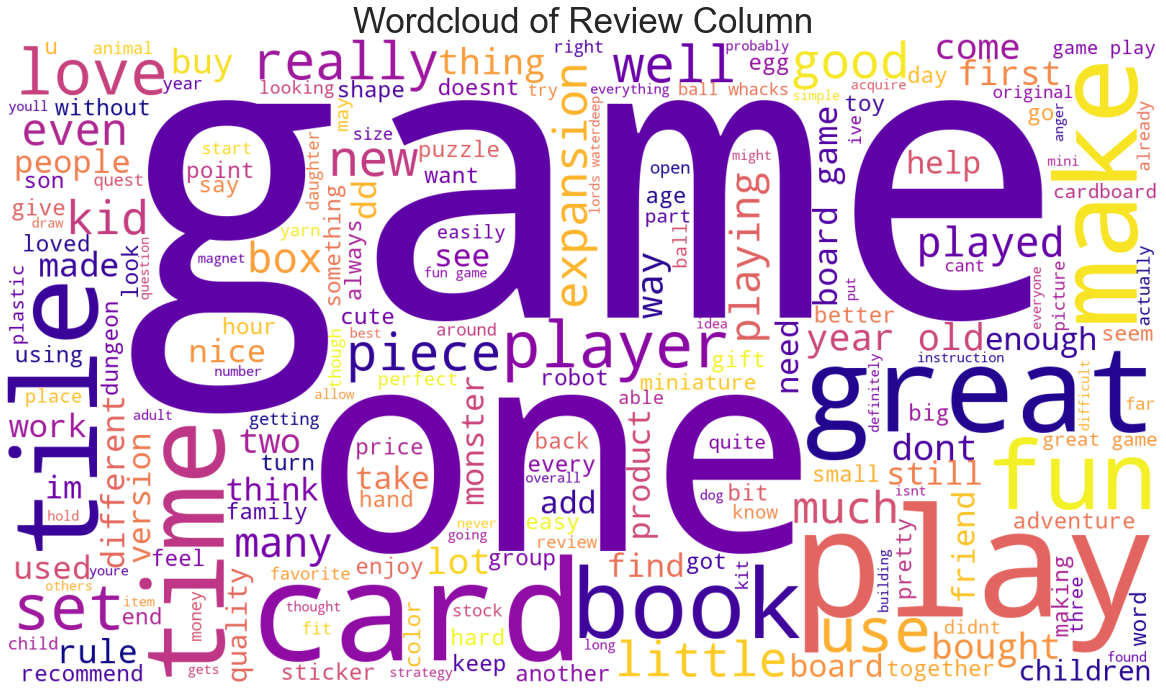

In [73]:
# Create a wordcloud without stop words for review column
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(tokens2_review_string) 

# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0)
plt.title('Wordcloud of Review Column', size = 35)
plt.savefig('Wordcloud of Review Column')
plt.show()

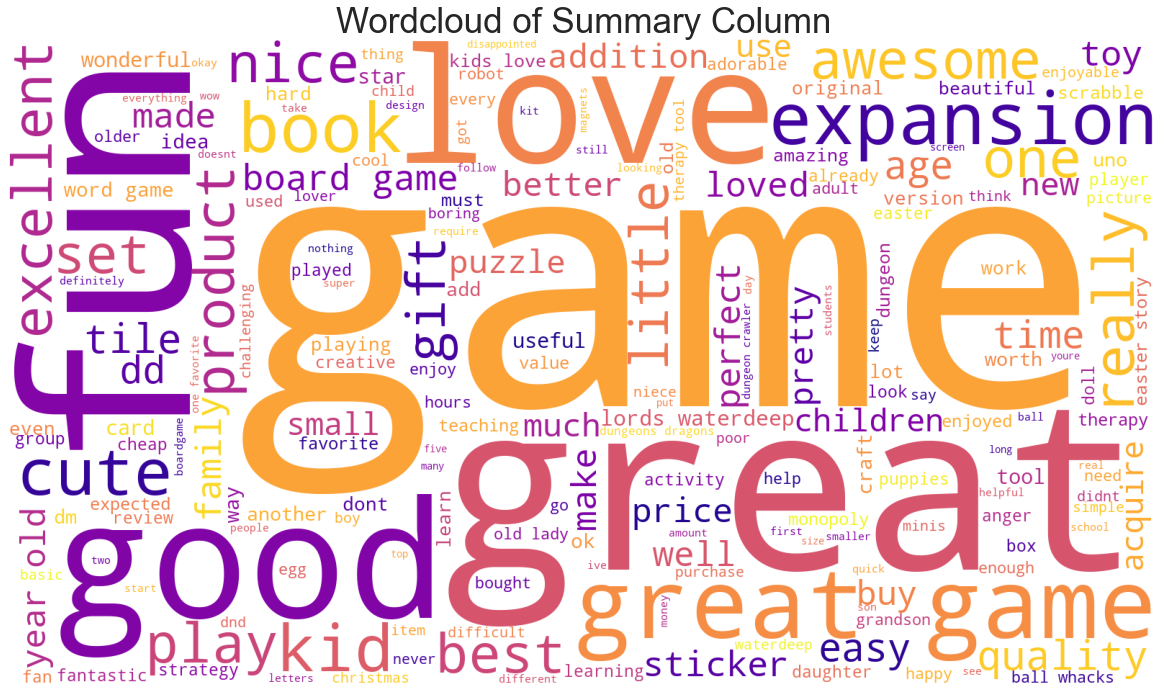

In [74]:
# Create a wordcloud without stop words for summary column
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(tokens2_summary_string) 

# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0)
plt.title('Wordcloud of Summary Column', size = 35)
plt.savefig('Wordcloud of Summary Column')
plt.show()

### 4d) Identify 15 most common words and polarity

In [265]:
# Determine the 15 most common words for review column
# View the frequency distribution.
fdist1_review = FreqDist(tokens2_review)

# Preview the data.
fdist1_review

FreqDist({'game': 1359, 'one': 475, 'play': 442, 'fun': 407, 'great': 392, 'like': 373, 'get': 293, 'cards': 281, 'tiles': 280, 'really': 278, ...})

In [266]:
# Generate a DataFrame from Counter.
counts_review = pd.DataFrame(Counter(tokens2_review).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
counts_review

,Frequency
Word,
game,1359
one,475
play,442
fun,407
great,392
like,373
get,293
cards,281
tiles,280


In [267]:
# Determine the 15 most common words for summary column
# View the frequency distribution.
fdist1_summary = FreqDist(tokens2_summary)

# Preview the data.
fdist1_summary

FreqDist({'game': 268, 'great': 237, 'fun': 175, 'good': 84, 'love': 70, 'like': 54, 'kids': 48, 'book': 42, 'expansion': 42, 'cute': 40, ...})

In [268]:
# Generate a DataFrame from Counter.
counts_summary = pd.DataFrame(Counter(tokens2_summary).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
counts_summary

,Frequency
Word,
game,268
great,237
fun,175
good,84
love,70
like,54
kids,48
book,42
expansion,42


## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [76]:
# Provided function for polarity
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

In [77]:
# Determine polarity of both columns. 
# Populate a new column with polarity scores for each review.
df3['polarity_review'] = df3['review'].apply(generate_polarity)

# View output.
df3['polarity_review'].head()

0   -0.036111
1    0.035952
2    0.116640
3    0.578788
4   -0.316667
Name: polarity_review, dtype: float64

In [78]:
# Populate a new column with polarity scores for each summary.
df3['polarity_summary'] = df3['summary'].apply(generate_polarity)

# View output.
df3['polarity_summary'].head()

0    0.15
1   -0.80
2    0.00
3    0.00
4    0.00
Name: polarity_summary, dtype: float64

In [79]:
df3.head()

,index,review,summary,polarity_review,polarity_summary
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...,-0.036111,0.15
1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...,0.035952,-0.80
2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless,0.116640,0.00
3,3,amazing buy bought it as a gift for our new dm...,five stars,0.578788,0.00
4,4,as my review of gf9s previous screens these we...,money trap,-0.316667,0.00


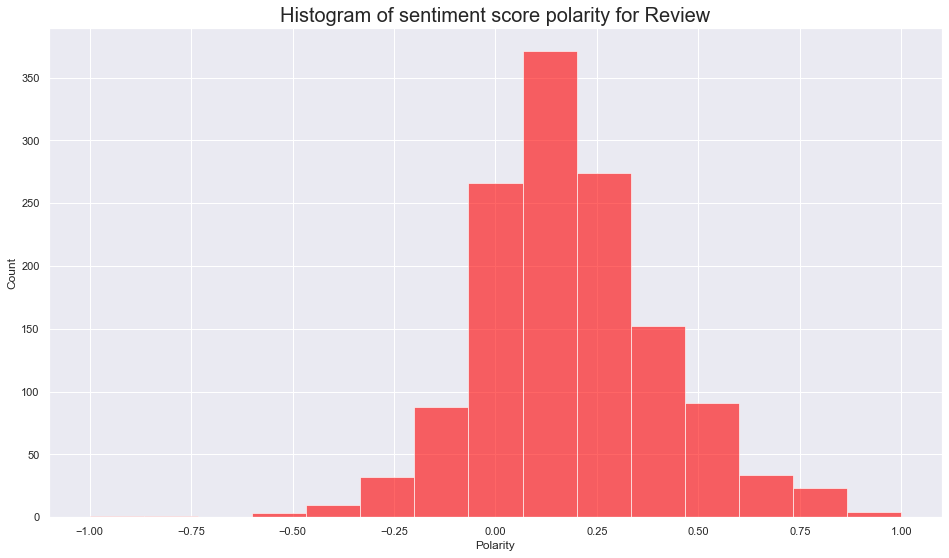

In [84]:
# Review: Create a histogram plot with bins = 15.
# Histogram of polarity

# Set the number of bins 
num_bins = 15

# Set the plot area 
plt.figure(figsize=(16,9))

# Define the bars
n, bins, patches = plt.hist(df3['polarity_review'], num_bins, facecolor='red', alpha = 0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score polarity for Review', fontsize=20)
plt.savefig('Histogram of sentiment score polarity for Review ')

plt.show()

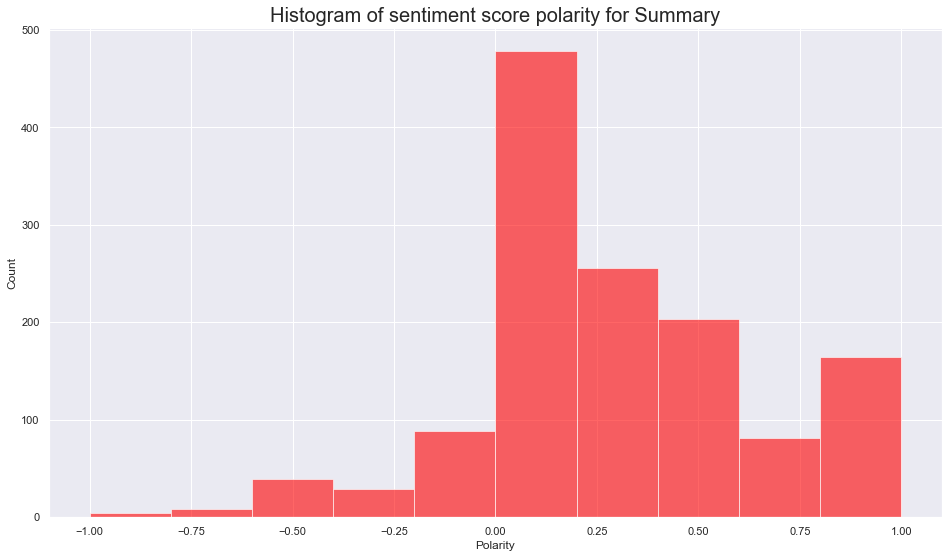

In [86]:
# Summary: Create a histogram plot with bins = 15.
# Histogram of polarity

# Set the number of bins 
num_bins = 10

# Set the plot area 
plt.figure(figsize=(16,9))

# Define the bars
n, bins, patches = plt.hist(df3['polarity_summary'], num_bins, facecolor='red', alpha = 0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score polarity for Summary', fontsize=20)
plt.savefig('Histogram of sentiment score polarity for Summary 2')

plt.show()

## 6. Identify top 20 positive and negative reviews and summaries respectively

In [288]:
# Top 20 positive reviews.

# Create a dataframe 
positive_sentiment_review = df3.nlargest(20, 'polarity_review')

# Eliminate unnecessary columns 
positive_sentiment_review = positive_sentiment_review[['index', 'review', 'polarity_review']]

# Adjust the column width for better readability of the comments column 
positive_sentiment_review.style.set_properties(subset=['review'], **{'width': '1200px'})


,index,review,polarity_review
564,790,perfect,1.000000
1081,1550,my daughter loves her stickers awesome seller thank you,1.000000
1335,1967,perfect for tutoring my grandson in spelling,1.000000
891,1245,the best part i see is the box what a wonderfully diverse and rounded set for the cost i am so happy and as the dm you know that if i am happy my players are happy,0.880000
498,703,great quality very cute and perfect for my toddler,0.816667
31,36,the pictures are great ive done one and gave it to a friend of mine who likes dragons,0.800000
336,474,great seller happy with my purchase 5 starrrr,0.800000
439,620,great easter gift for kids,0.800000
491,685,these are great,0.800000
575,804,great,0.800000


In [289]:
# Top 20 positive summaries.

# Create a dataframe 
positive_sentiment_summary = df3.nlargest(20, 'polarity_summary')

# Eliminate unnecessary columns 
positive_sentiment_summary = positive_sentiment_summary[['index', 'summary', 
                                                         'polarity_summary']]

# Adjust the column width for better readability of the comments column 
positive_sentiment_summary.style.set_properties(subset=['summary'], **{'width': '1200px'})


,index,summary,polarity_summary
5,6,best gm screen ever,1.000000
23,28,wonderful designs,1.000000
27,32,perfect,1.000000
61,80,theyre the perfect size to keep in the car or a diaper,1.000000
107,134,perfect for preschooler,1.000000
112,140,awesome sticker activity for the price,1.000000
132,161,awesome book,1.000000
133,163,he was very happy with his gift,1.000000
150,187,awesome,1.000000
166,210,awesome and welldesigned for 9 year olds,1.000000


In [290]:
# Top 20 negative reviews.

# Create a dataframe 
negative_sentiment_review = df3.nsmallest(20, 'polarity_review')

# Eliminate unnecessary columns 
negative_sentiment_review = negative_sentiment_review[['index', 'review', 'polarity_review']]

# Adjust the column width for better readability of the comments column 
negative_sentiment_review.style.set_properties(subset=['review'], **{'width': '1200px'})


,index,review,polarity_review
165,208,booo unles you are patient know how to measure i didnt have the patience neither did my daughter boring unless you are a craft person which i am not,-1.000000
147,182,incomplete kit very disappointing,-0.780000
267,364,one of my staff will be using this game soon so i dont know how well it works as yet but after looking at the cards i believe it will be helpful in getting a conversation started regarding anger and what to do to control it,-0.550000
90,117,i bought this as a christmas gift for my grandson its a sticker book so how can i go wrong with this gift,-0.500000
141,174,i sent this product to my granddaughter the pompom maker comes in two parts and is supposed to snap together to create the pompoms however both parts were the same making it unusable if you cant make the pompoms the kit is useless since this was sent as a gift i do not have it to return very disappointed,-0.491667
251,347,my 8 yearold granddaughter and i were very frustrated and discouraged attempting this craft it is definitely not for a young child i too had difficulty understanding the directions we were very disappointed,-0.446250
382,538,i purchased this on the recommendation of two therapists working with my adopted children the children found it boring and put it down half way through,-0.440741
312,437,this game although it appears to be like uno and have an easier play method it was still too time consuming and wordy for my children with learning disabilities,-0.400000
355,497,my son loves playing this game it was recommended by a counselor at school that works with him,-0.400000
714,989,if you like me used to play dd but now you and your friends growed up and cant be together because all the responsibilities and bla bla bla this game is for you come to the dungeon,-0.400000


In [294]:
# Top 20 negative summaries.

# Create a dataframe 
negative_sentiment_summary = df3.nsmallest(20, 'polarity_summary')

# Eliminate unnecessary columns 
negative_sentiment_summary = negative_sentiment_summary[['index', 'summary', 
                                                         'polarity_summary']]

# Adjust the column width for better readability of the comments column 
negative_sentiment_summary.style.set_properties(subset=['summary'], **{'width': '1200px'})


,index,summary,polarity_summary
17,21,the worst value ive ever seen,-1.000000
165,208,boring unless you are a craft person which i am,-1.000000
588,829,boring,-1.000000
838,1166,before this i hated running any rpg campaign dealing with towns because it,-0.900000
1,1,another worthless dungeon masters screen from galeforce9,-0.800000
116,144,disappointed,-0.750000
266,363,promotes anger instead of teaching calming methods,-0.700000
635,885,too bad this is not what i was expecting,-0.700000
638,890,bad qualityall made of paper,-0.700000
144,178,at age 31 i found these very difficult to make,-0.650000


## 7. Discuss: Insights and observations

***Your observations here...***

The review histogram indicated that the majority of feedback was positive as the majority of the data fell beyond the neutral mark of 0. This should give Turtle Games some confidence that on the whole customers are largely happy with their products. Whilst there is a significant amount of feedback that is neutral, negative sentiment is limited when compared to positive sentiment. 

The histogram for the summaries told a similar story, although the feedback was more varied with negative sentiment stretching across the entire scale all the way to -1. That said, the vast majority of the data was positive with a very large proportion of it also being neutral, at 0.

# 